In [70]:
# %pip install -U seaborn

In [71]:
# %pip install -U matplotlib

In [25]:
from warnings import filterwarnings
filterwarnings('ignore')

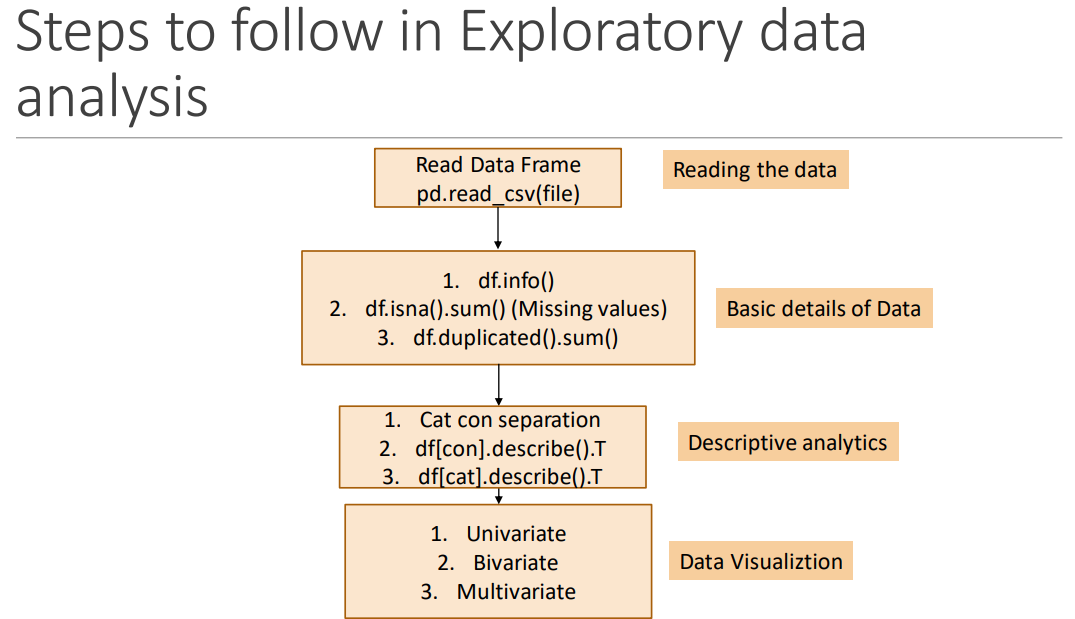

### Step 1 : Reading the Dataset

In [26]:
import pandas as pd
path = r"C:\Users\DELL\Downloads\laptopPrice.csv"
df = pd.read_csv(path)
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


# Step 2 : Perform basic Data quality checks

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [28]:
df.isna().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [29]:
df.duplicated().sum()

21

## Drop duplicates

In [30]:
df = df.drop_duplicates(keep='first')

In [31]:
df.shape

(802, 19)

## Step 3 : Descriptive Analysis

In [32]:
df.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [33]:
df.dtypes

brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb               object
ram_type             object
ssd                  object
hdd                  object
os                   object
os_bit               object
graphic_card_gb      object
weight               object
warranty             object
Touchscreen          object
msoffice             object
Price                 int64
rating               object
Number of Ratings     int64
Number of Reviews     int64
dtype: object

In [34]:
# Categorical(object) and continious(non object) seperation
cat = list(df.columns[df.dtypes=='object'])
con = list(df.columns[df.dtypes!='object'])

In [35]:
cat

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

In [36]:
con

['Price', 'Number of Ratings', 'Number of Reviews']

In [37]:
df[cat].describe().T

,count,unique,top,freq
brand,802,8,ASUS,243
processor_brand,802,3,Intel,594
processor_name,802,11,Core i5,284
processor_gnrtn,802,8,11th,328
ram_gb,802,4,8 GB,404
ram_type,802,6,DDR4,690
ssd,802,7,512 GB,389
hdd,802,4,0 GB,602
os,802,3,Windows,763
os_bit,802,2,64-bit,693


In [38]:
df['brand'].value_counts()

brand
ASUS      243
DELL      149
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      23
Avita       6
Name: count, dtype: int64

In [39]:
df['processor_brand'].value_counts()

processor_brand
Intel    594
AMD      189
M1        19
Name: count, dtype: int64

In [40]:
df[con].describe().T

,count,mean,std,min,25%,50%,75%,max
Price,802.0,76625.543641,45232.984422,16990.0,45990.0,63990.0,89525.00,441990.0
Number of Ratings,802.0,299.844140,1001.784420,0.0,0.0,17.0,140.25,15279.0
Number of Reviews,802.0,36.089776,118.313553,0.0,0.0,2.0,18.00,1947.0


### here 25% is quartile 1 or Q1, 50% is Q2 or median and 75% is Q3 or quartile 3 
### Here std is standard deviation

## Step 4 : Data visualisation

### Univariate analysis (plots used?)
1. cat - Countplot
2. con - Histogram

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
cat

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

In [42]:
con

['Price', 'Number of Ratings', 'Number of Reviews']

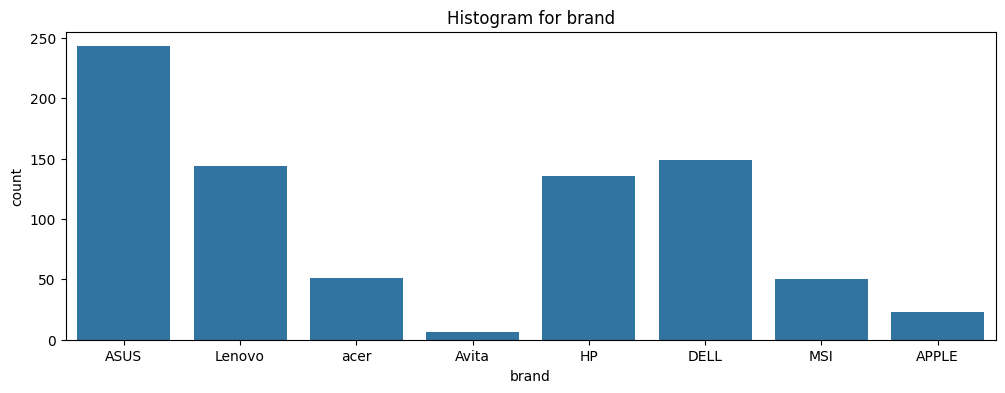

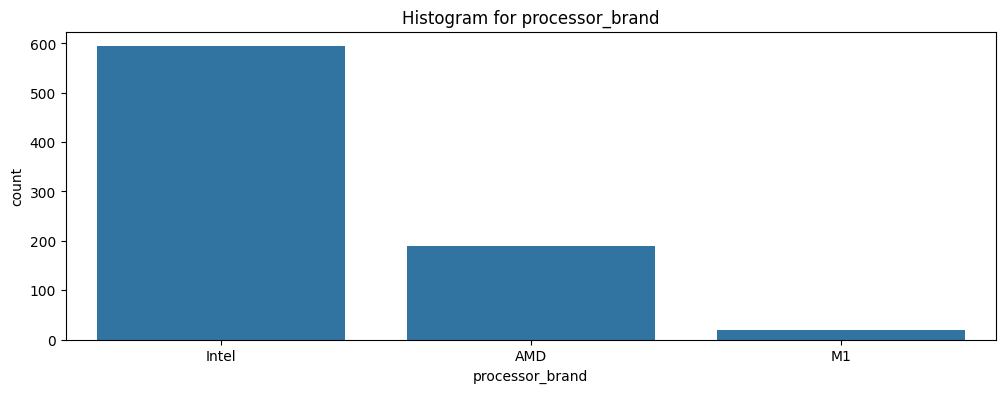

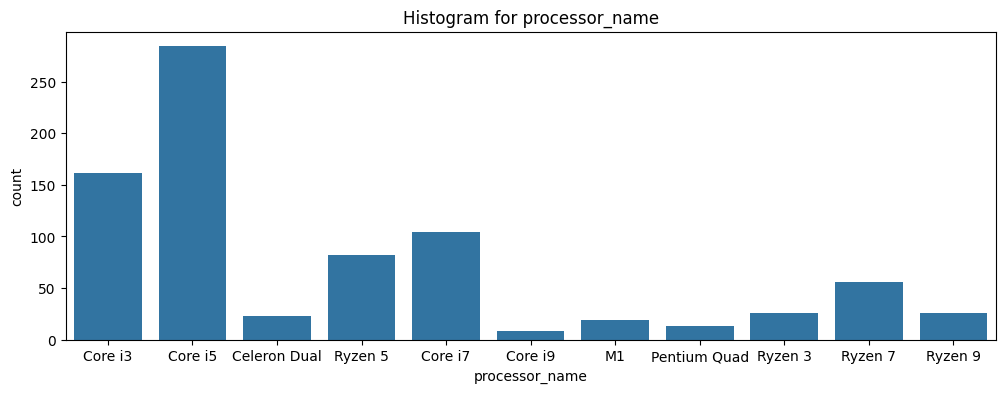

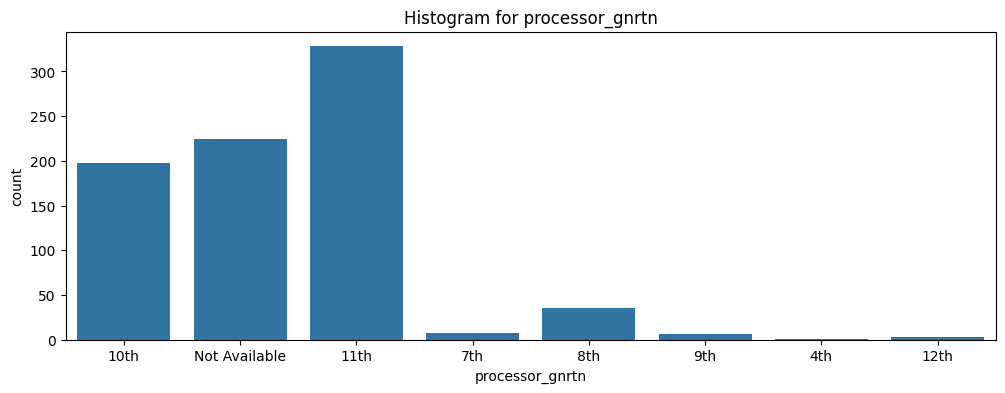

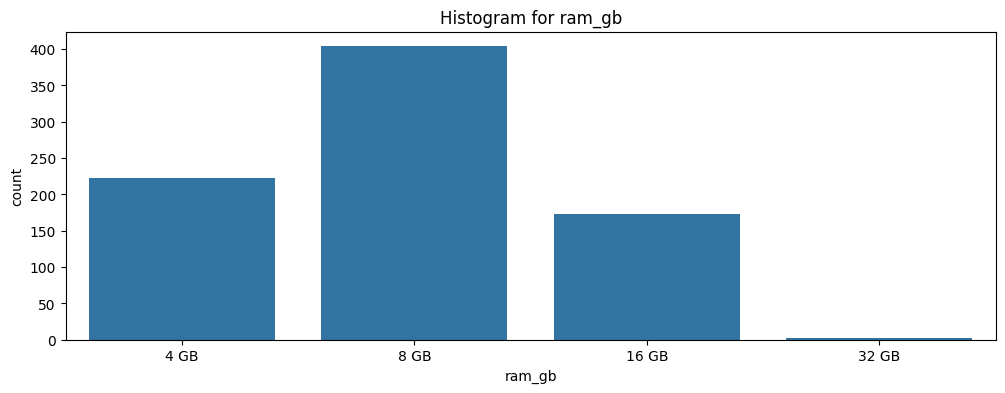

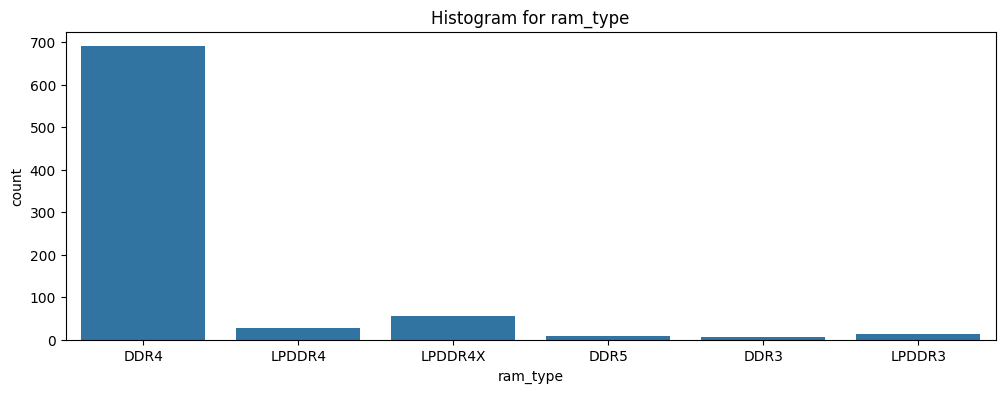

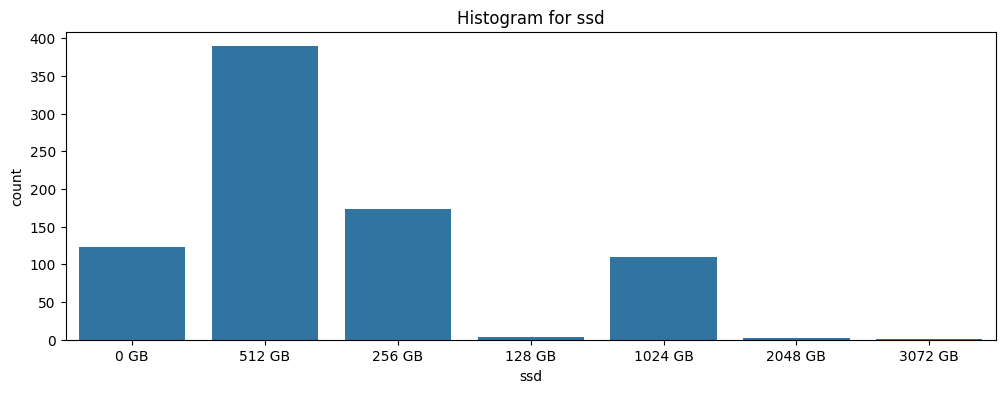

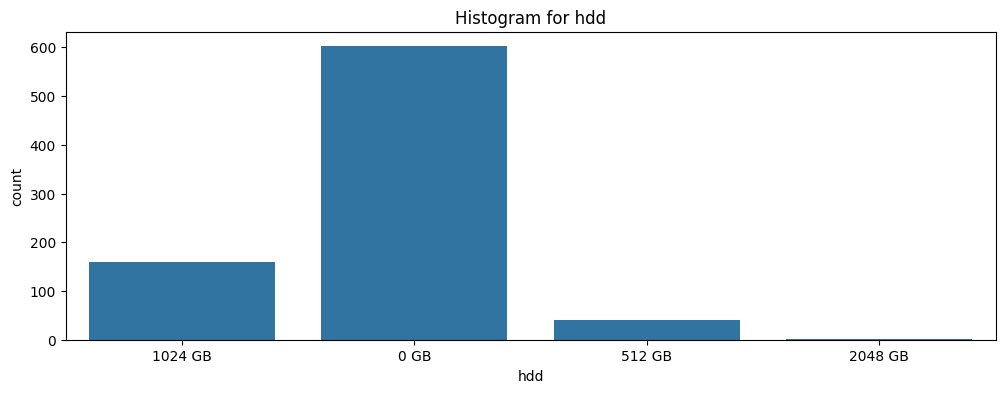

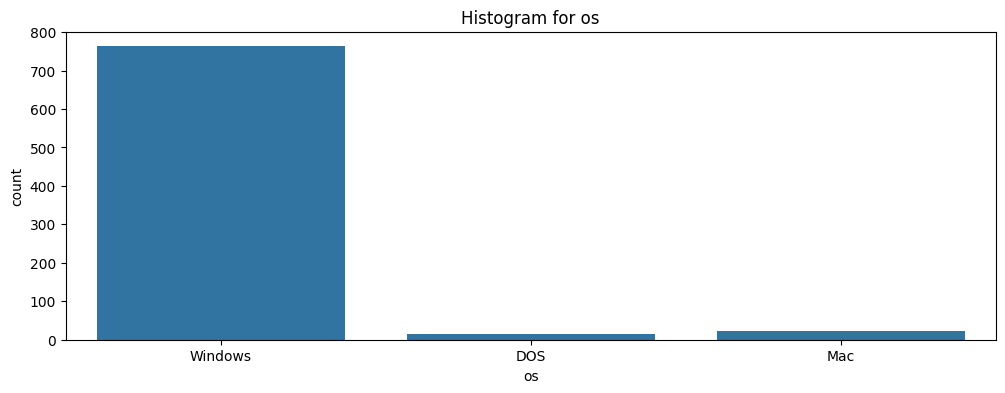

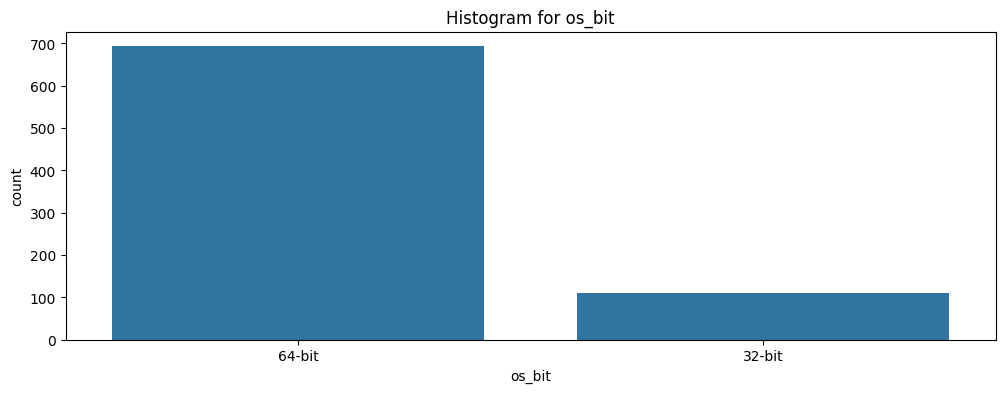

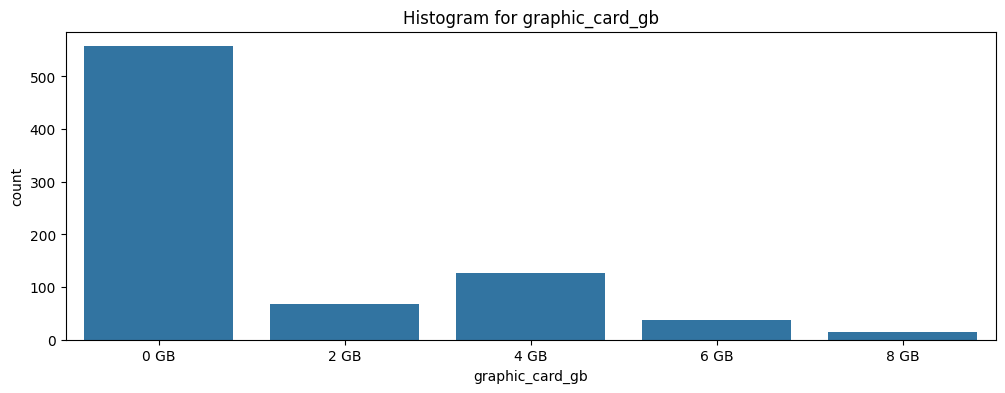

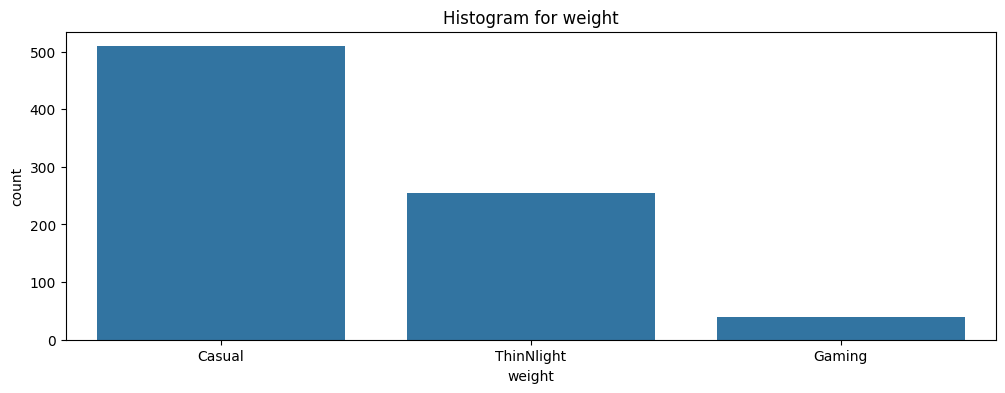

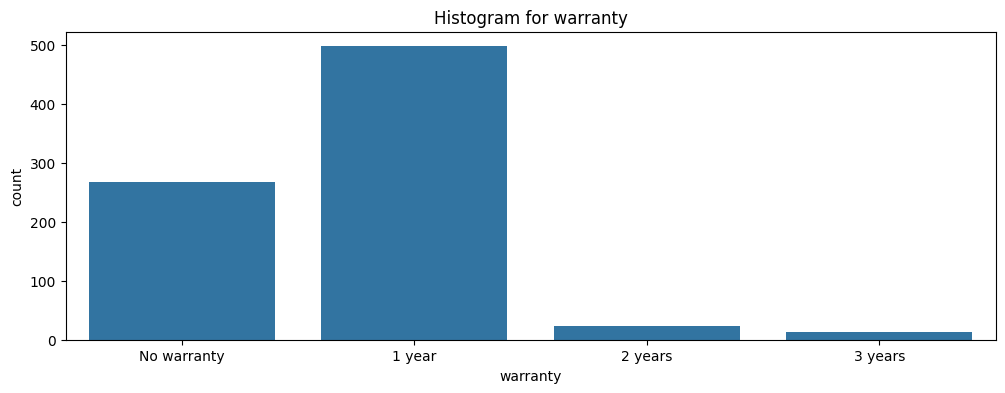

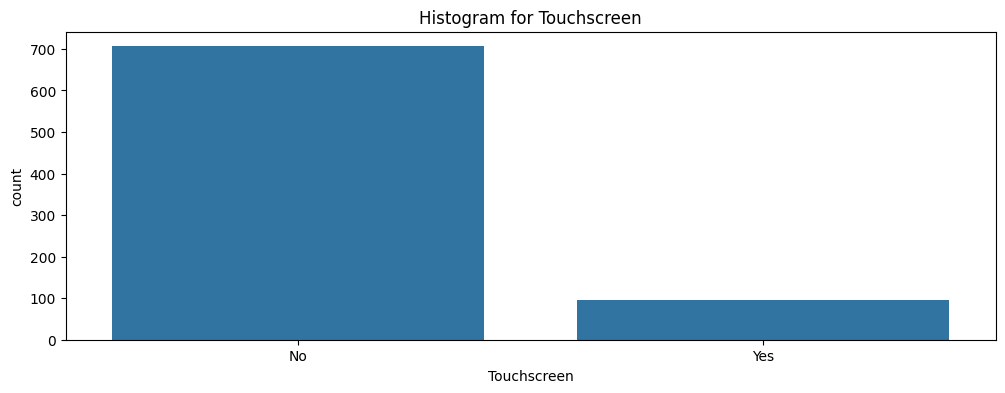

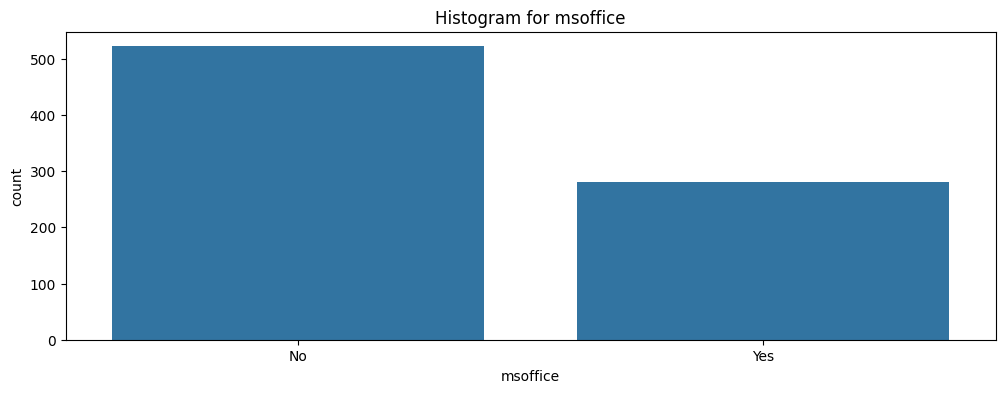

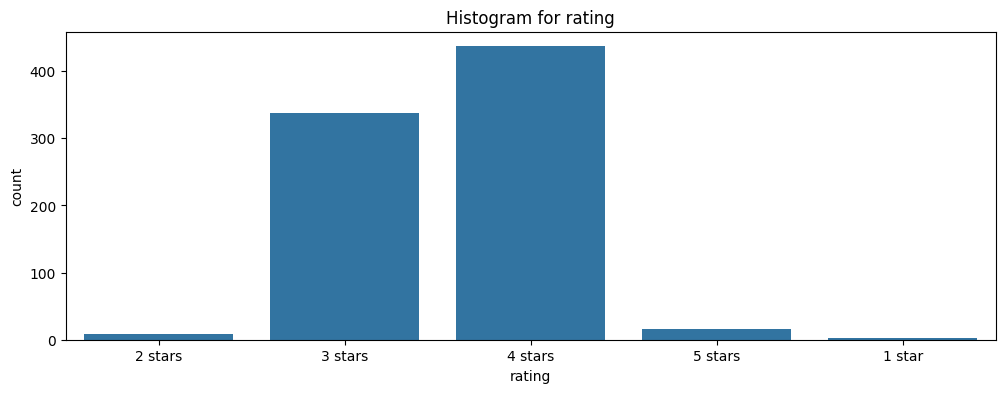

In [50]:
for i in cat:
    plt.figure(figsize=(12, 4))
    sns.countplot(data=df, x=i)
    plt.title(f'Histogram for {i}')
    plt.show()

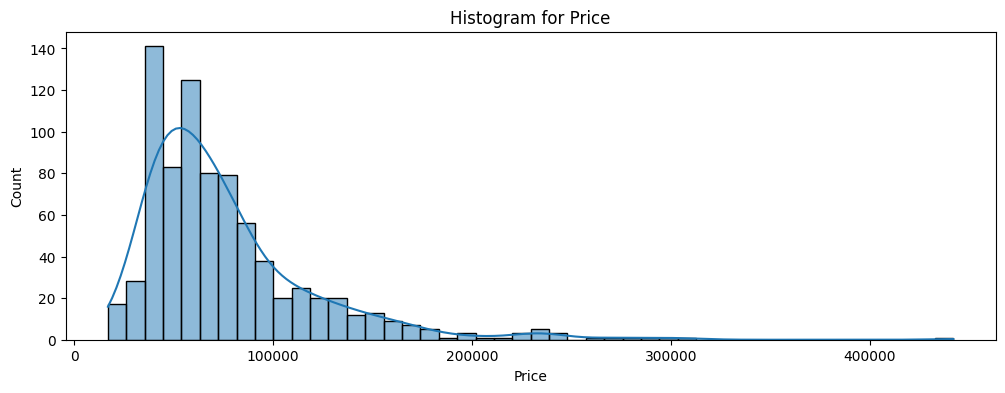

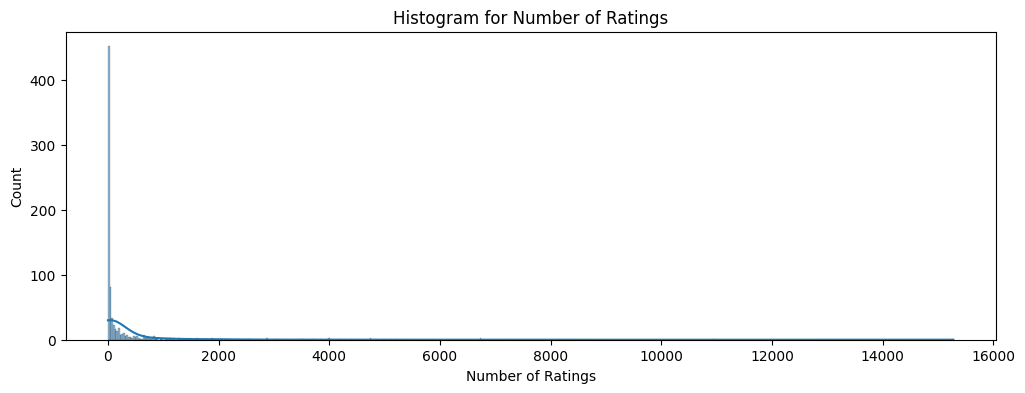

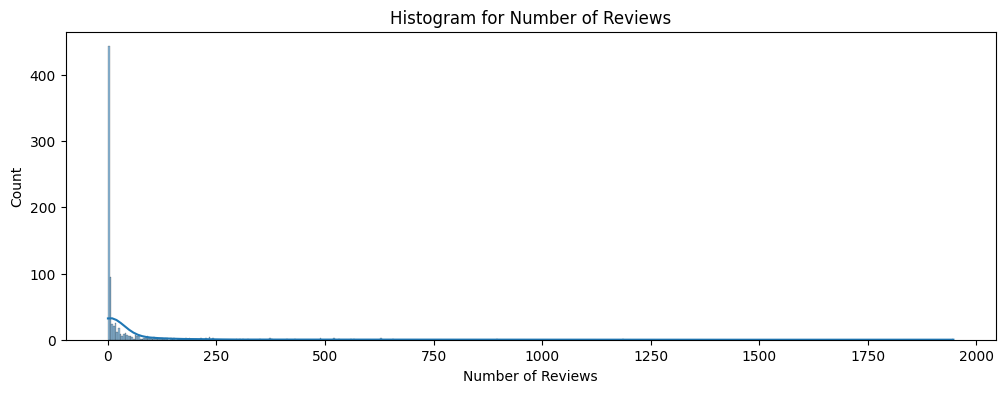

In [51]:
for i in con:
    plt.figure(figsize=(12, 4))
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f'Histogram for {i}')
    plt.show()

## Bivariate - 2 features analysis
1. con vs con - Scatterplot
2. cat vs con - Boxplot
3. cat vs cat - Crosstab heatmap

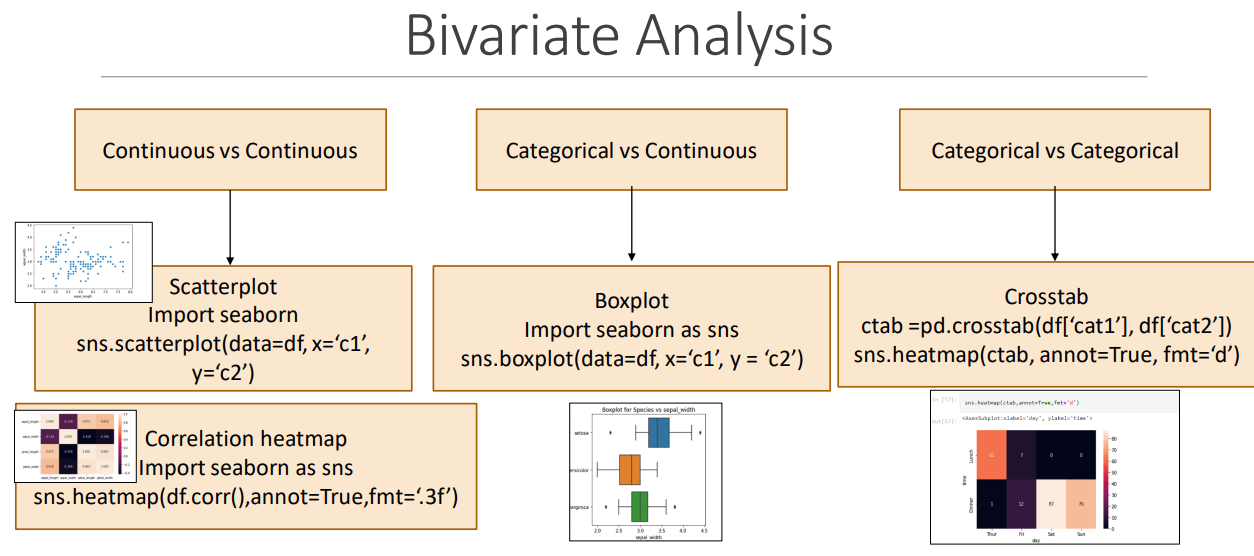

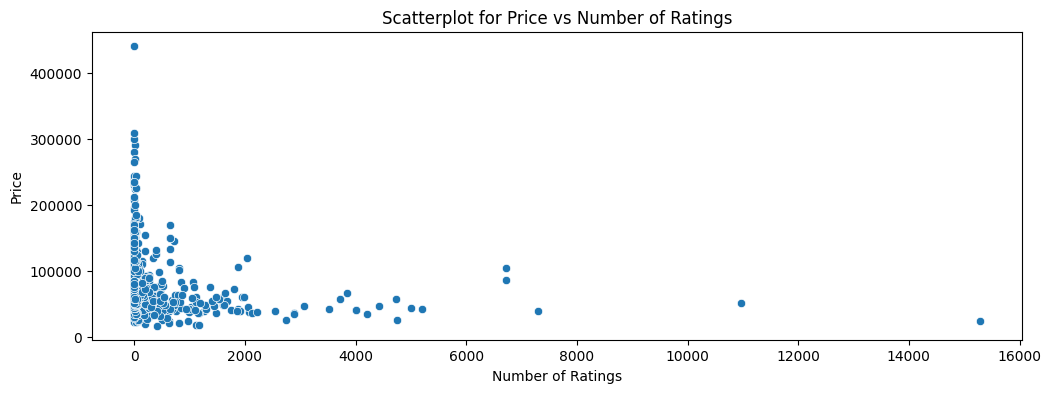

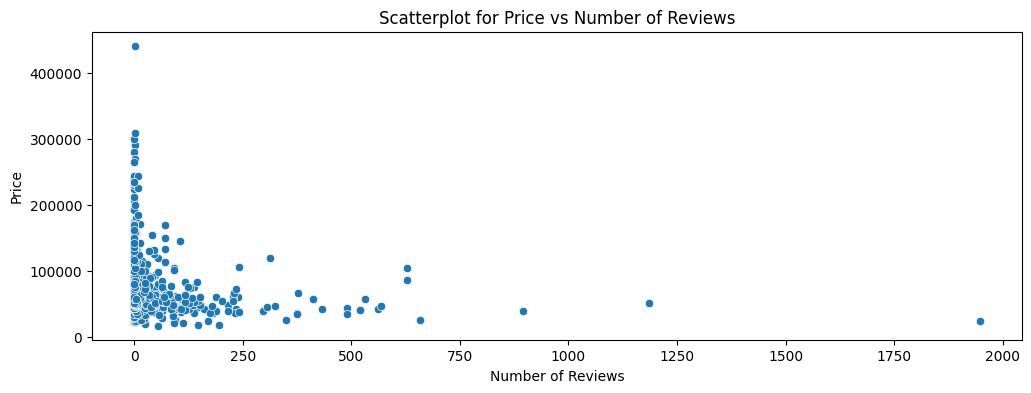

In [52]:
for i in con:
    if i!='Price':
        plt.figure(figsize=(12, 4))
        sns.scatterplot(data=df, x=i, y='Price')
        plt.title(f'Scatterplot for Price vs {i}')
        plt.show()

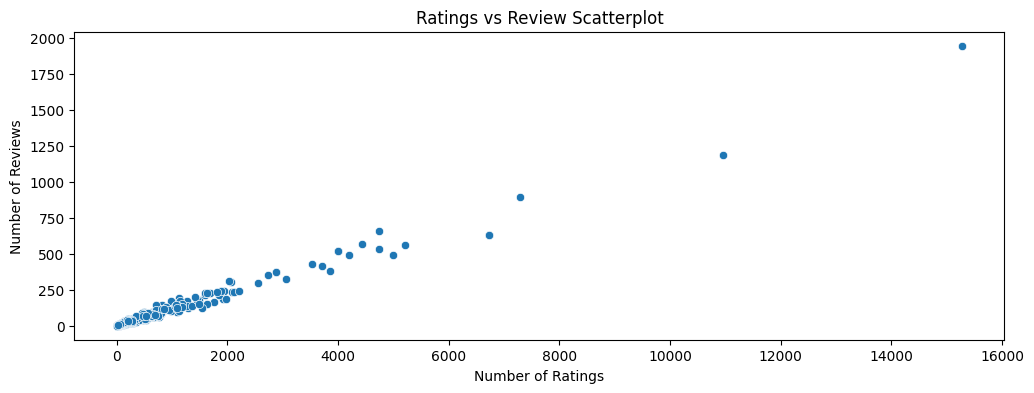

In [53]:
plt.figure(figsize=(12, 4))
sns.scatterplot(data=df, x='Number of Ratings', y='Number of Reviews')
plt.title('Ratings vs Review Scatterplot')
plt.show()

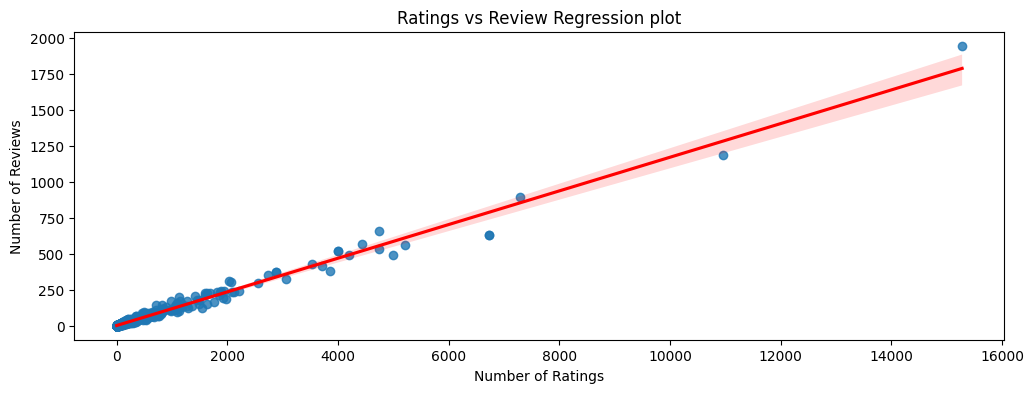

In [55]:
plt.figure(figsize=(12, 4))
sns.regplot(data=df, x='Number of Ratings', y='Number of Reviews',
           line_kws = {'color':'red'}) #kws-keywords
plt.title('Ratings vs Review Regression plot')
plt.show()

### Boxplot and its parts

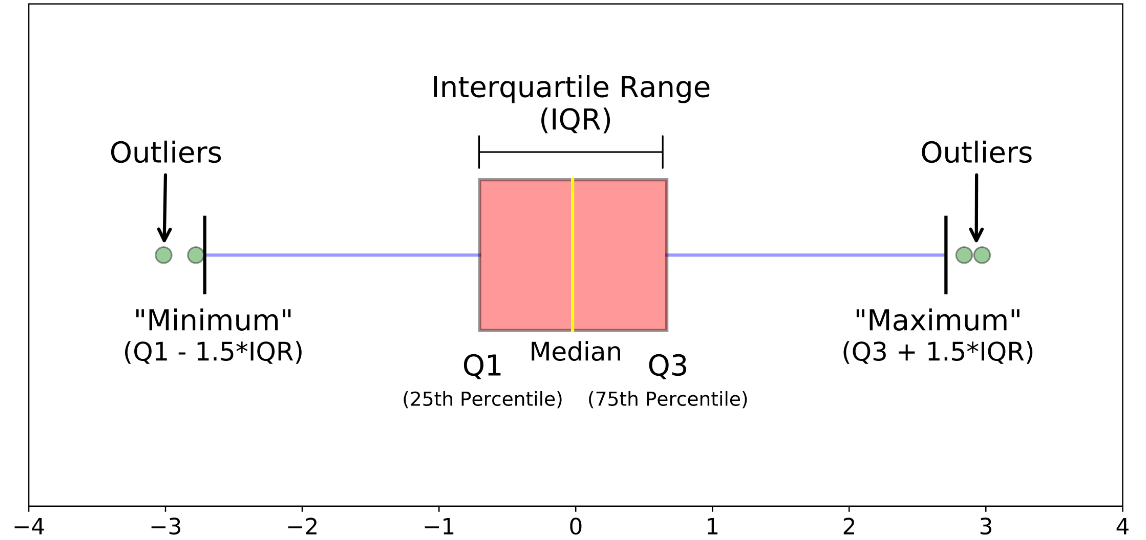

## Cat vs Con,boxplot

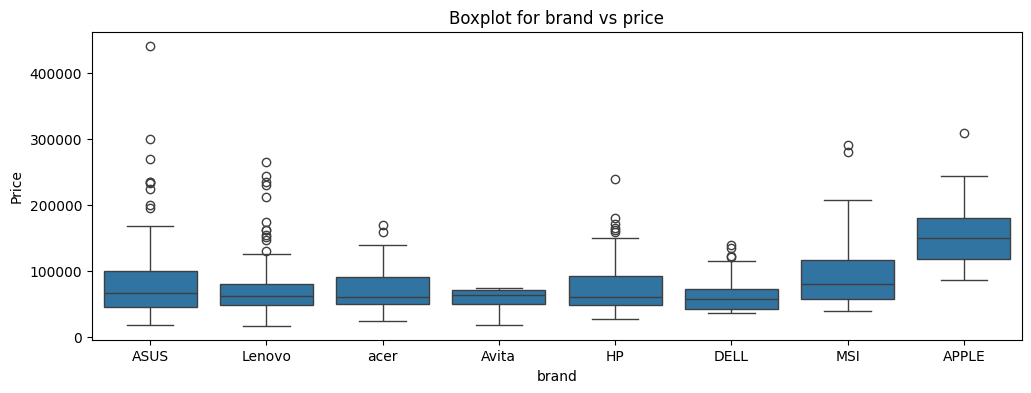

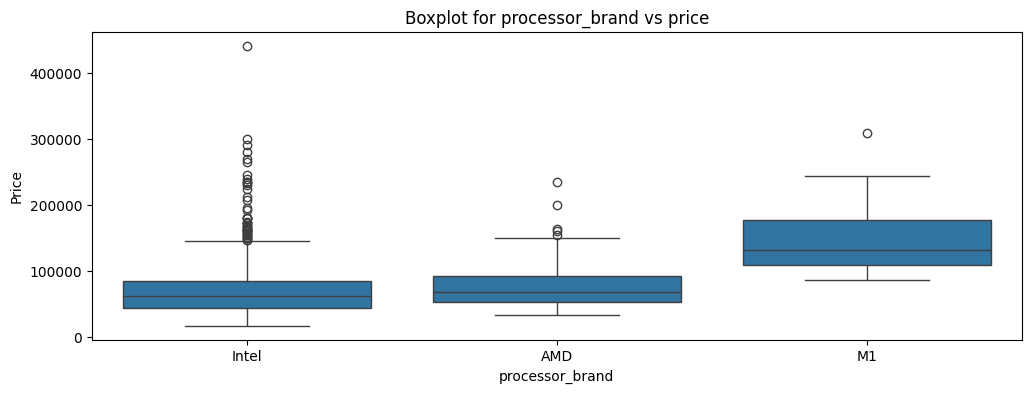

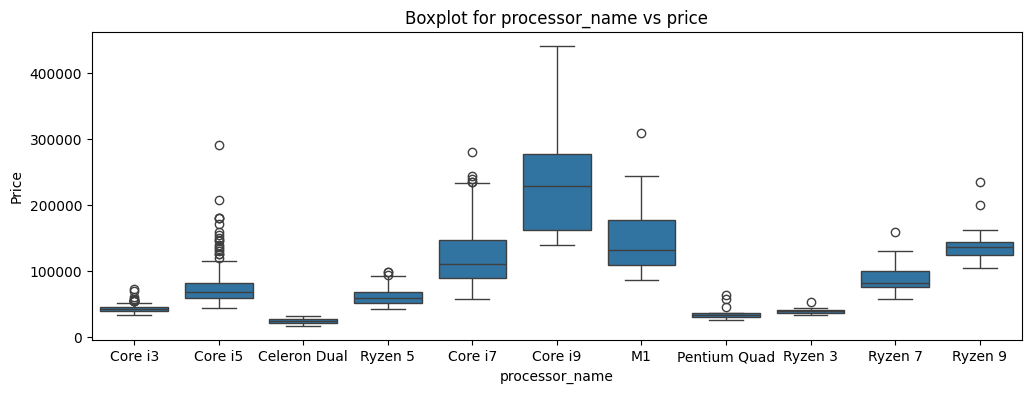

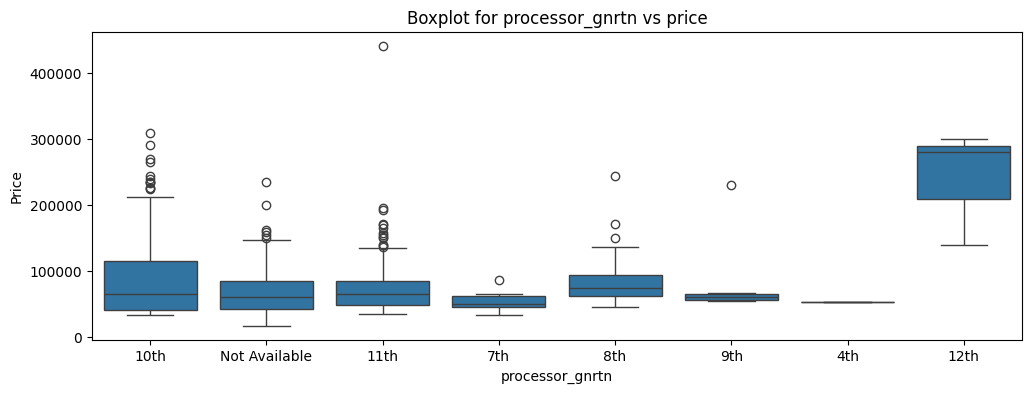

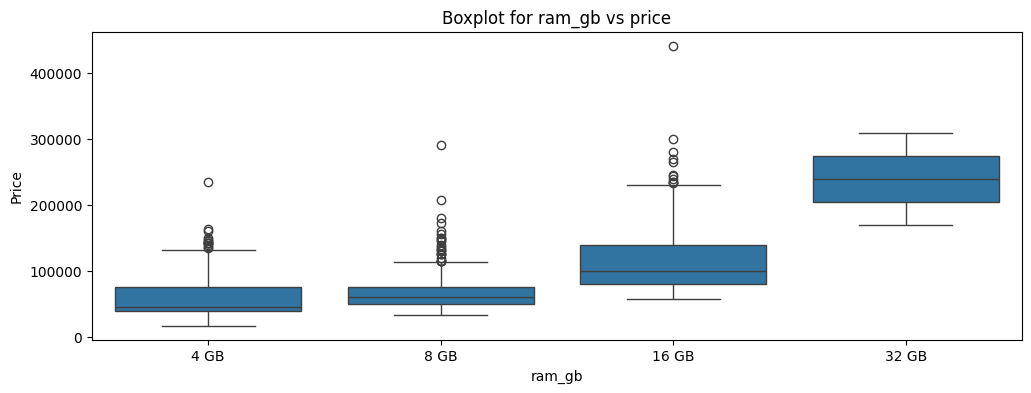

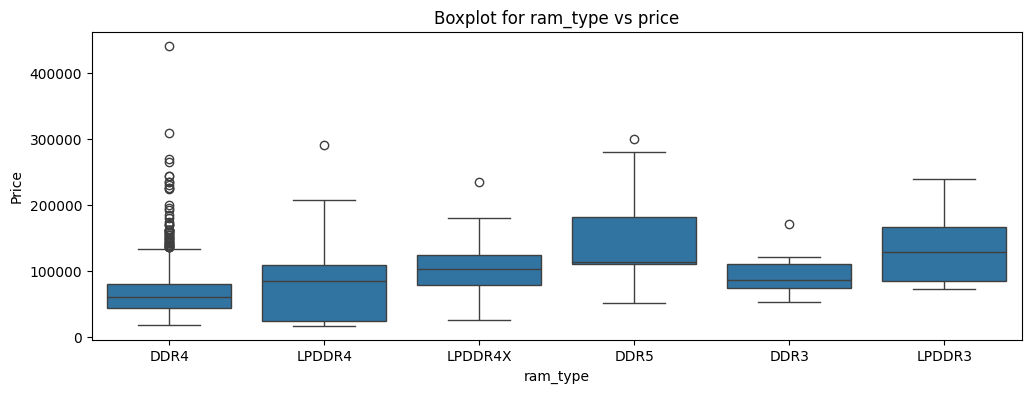

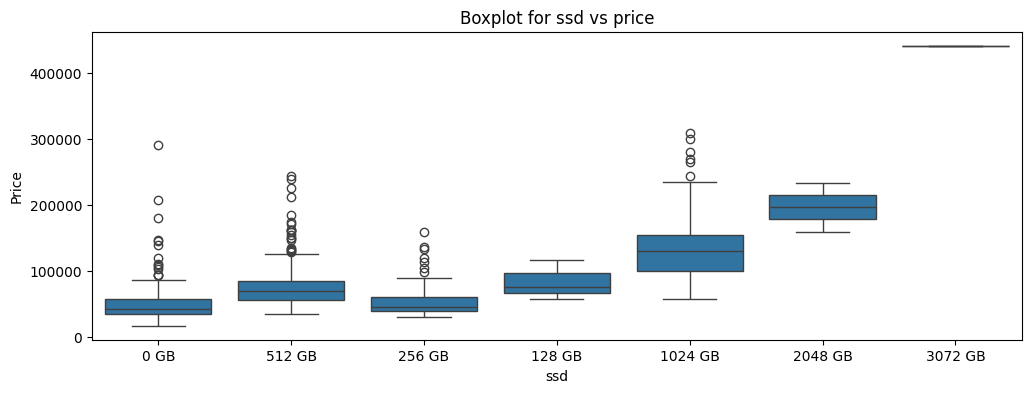

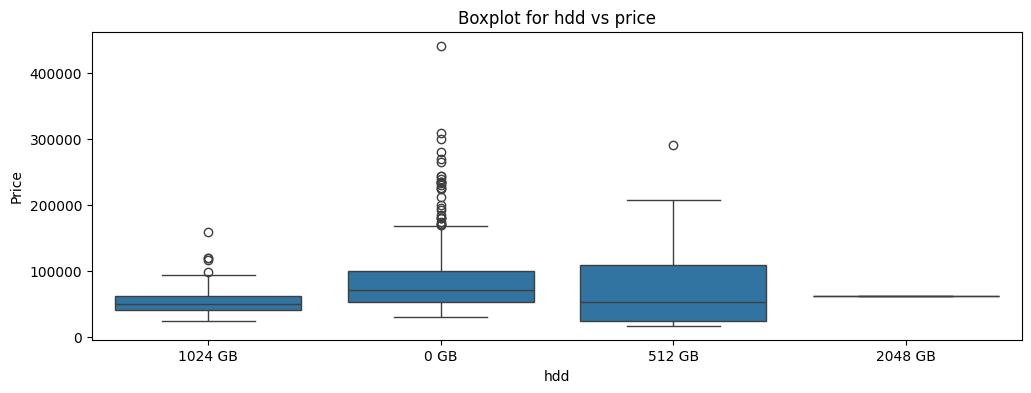

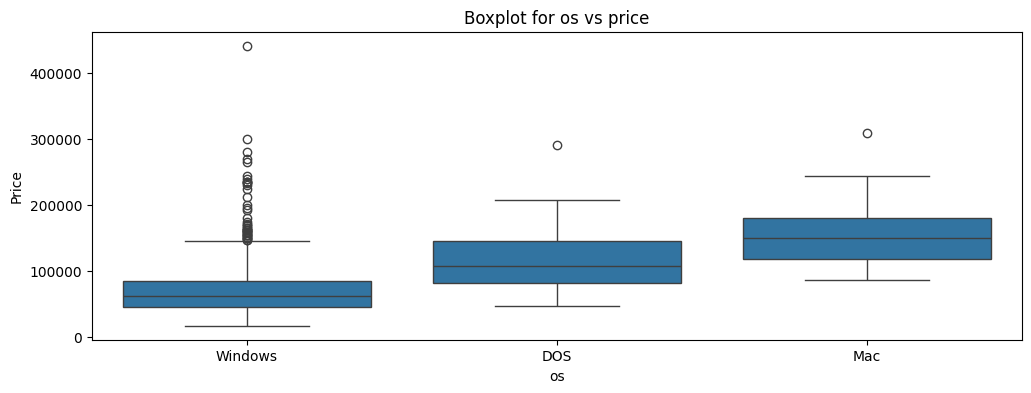

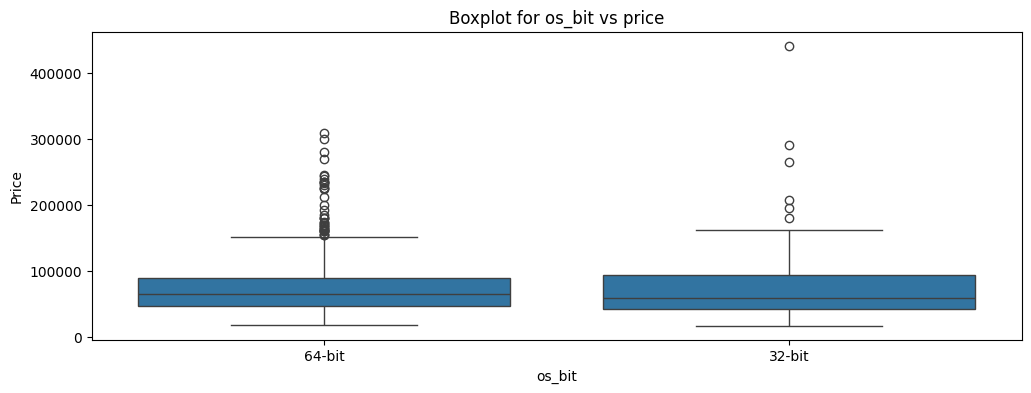

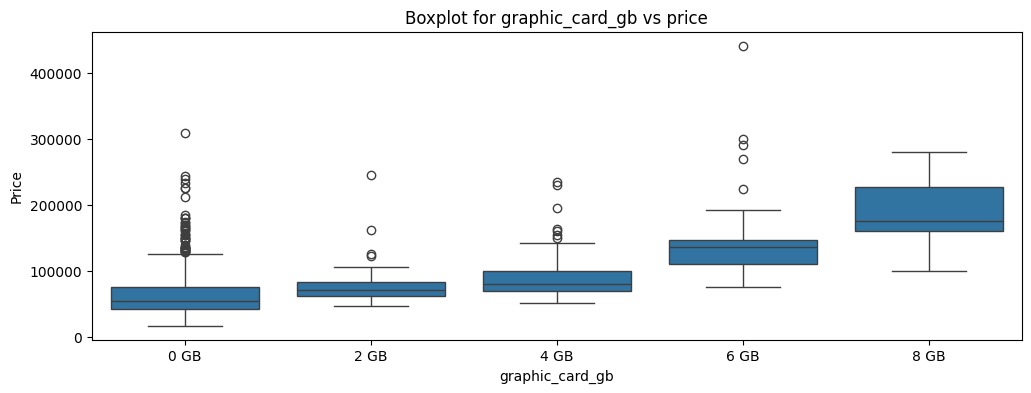

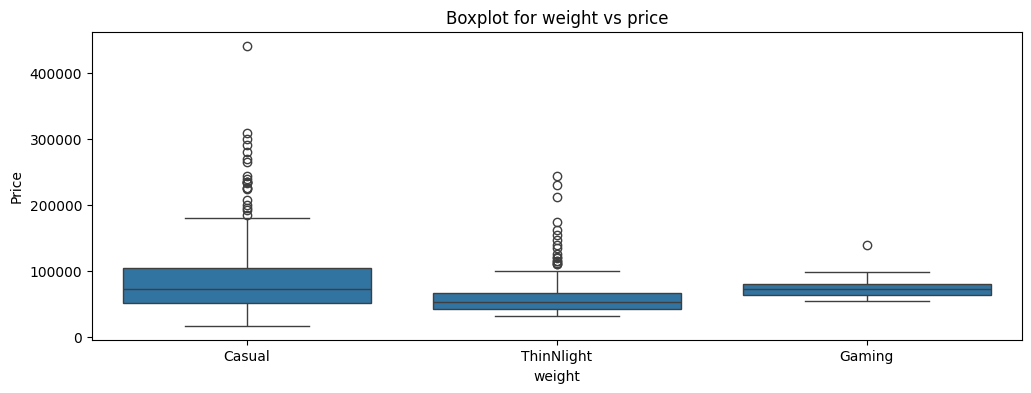

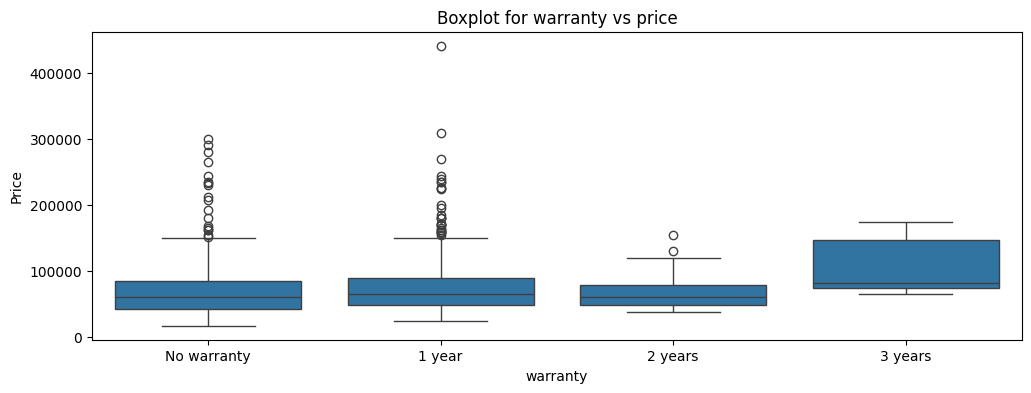

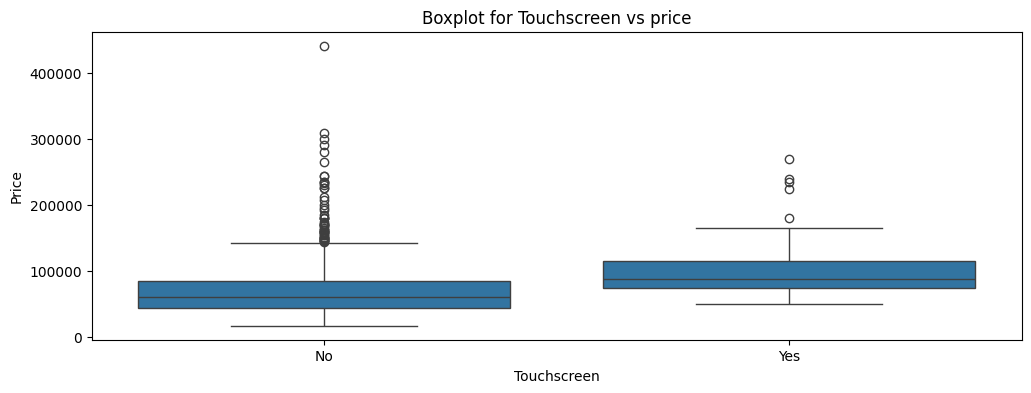

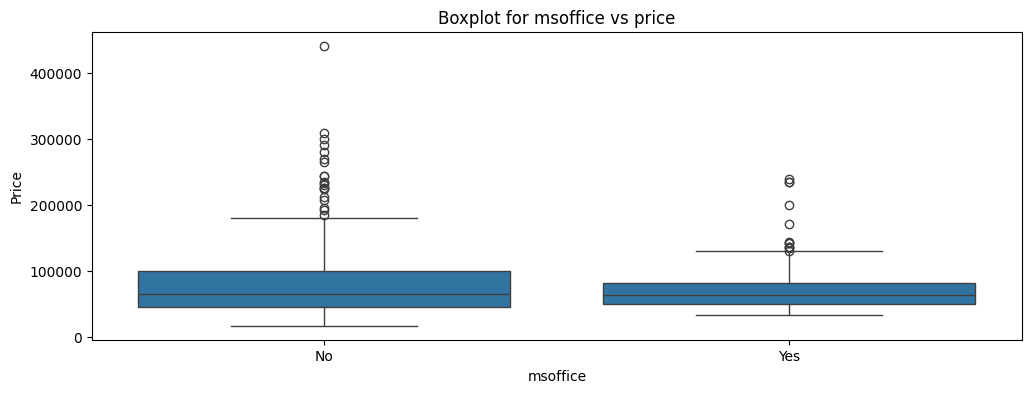

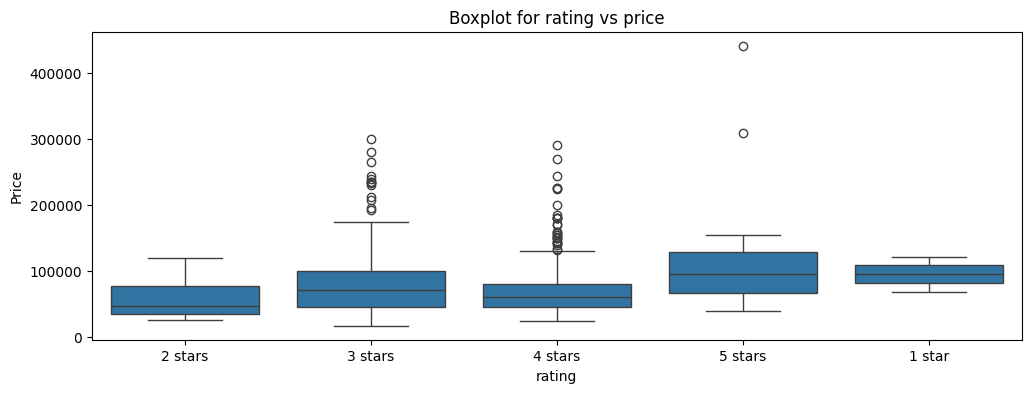

In [56]:
for i in cat:
    plt.figure(figsize=(12, 4))
    sns.boxplot(data=df, x=i, y='Price')
    plt.title(f'Boxplot for {i} vs price')
    plt.show()

cat

In [57]:
len(cat)

16

In [59]:
len(cat)**2  ## number of possible combinations for graph

256

## cat vs cat - create Crosstab first than Heatmap

In [61]:
ctab1 = pd.crosstab(df['brand'], df['processor_brand'])
ctab1

processor_brand,AMD,Intel,M1
brand,,,
APPLE,0,4,19
ASUS,66,177,0
Avita,0,6,0
DELL,31,118,0
HP,44,92,0
Lenovo,26,118,0
MSI,7,43,0
acer,15,36,0


<Axes: xlabel='processor_brand', ylabel='brand'>

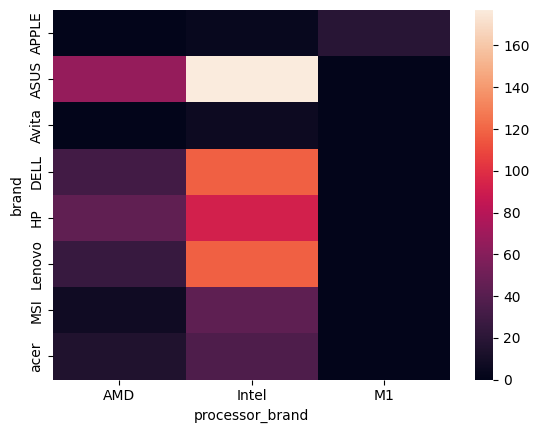

In [62]:
sns.heatmap(data=ctab1)

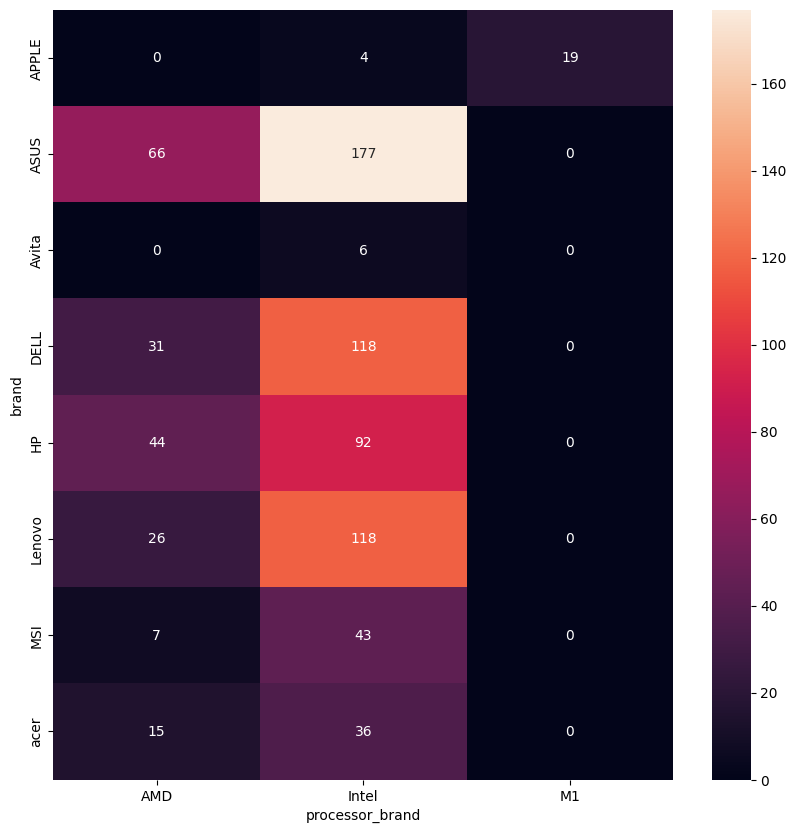

In [69]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=ctab1,annot = True, fmt='d')  #d denotes integer
plt.show()

In [66]:
sns.__version__

'0.13.2'

In [73]:
ctab2 = pd.crosstab(df['ram_gb'], df['graphic_card_gb'])
ctab2


graphic_card_gb,0 GB,2 GB,4 GB,6 GB,8 GB
ram_gb,,,,,
16 GB,87,17,35,25,9
32 GB,1,0,0,0,1
4 GB,184,1,30,6,2
8 GB,285,49,62,6,2


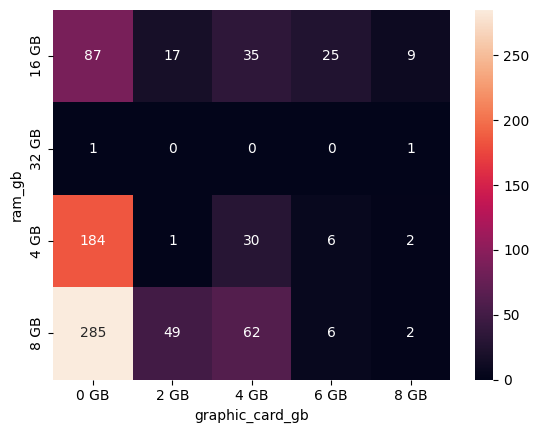

In [75]:
sns.heatmap(data=ctab2, annot=True, fmt='d')
plt.show()

## Multivariate analysis 3 or more than 3

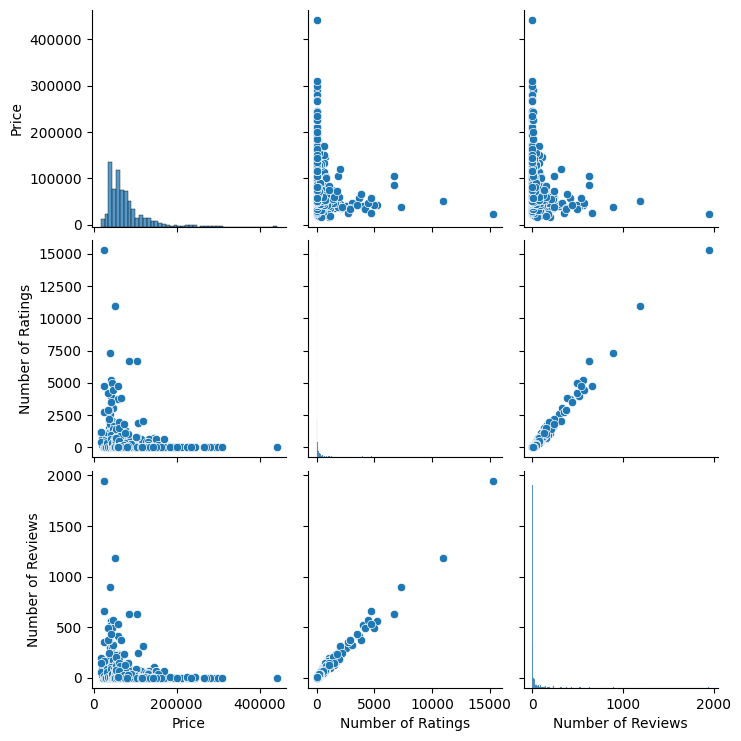

In [76]:
sns.pairplot(df)

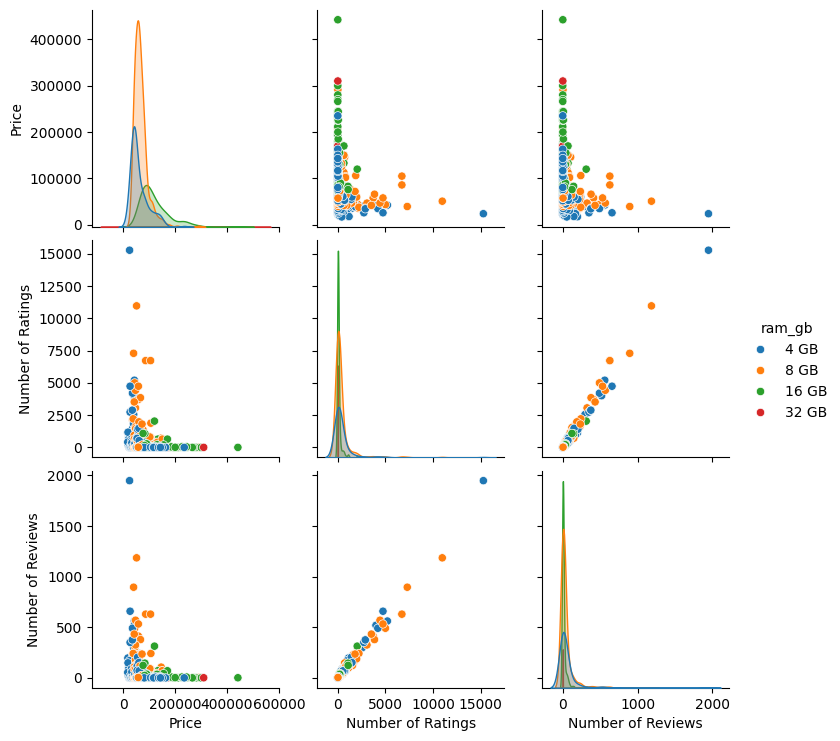

In [77]:
sns.pairplot(df, hue='ram_gb')

## Correlation Heatmap

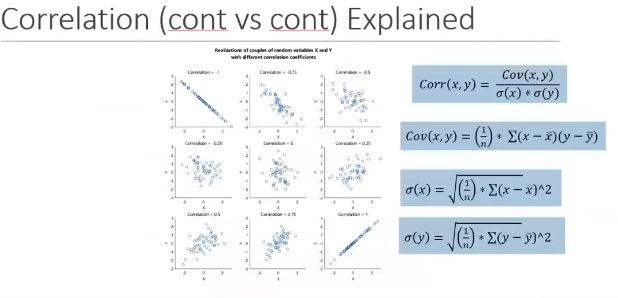

In [79]:
c = df.corr(numeric_only=True)
c

,Price,Number of Ratings,Number of Reviews
Price,1.000000,-0.152553,-0.156791
Number of Ratings,-0.152553,1.000000,0.991062
Number of Reviews,-0.156791,0.991062,1.000000


<Axes: >

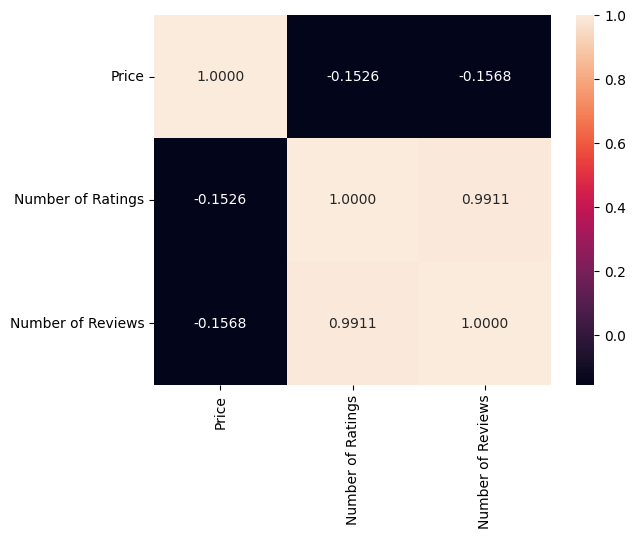

In [81]:
sns.heatmap(data=c, annot=True, fmt = '.4f')

# Get the average price by Brand

In [82]:
a = df.groupby(by ='brand').agg({'Price':'mean'})
a

,Price
brand,
APPLE,157081.304348
ASUS,79426.020576
Avita,56346.500000
DELL,60788.953020
HP,73640.272059
Lenovo,72920.208333
MSI,98713.020000
acer,72420.039216


<Axes: title={'center': 'Average Priceby Brand'}, xlabel='brand'>

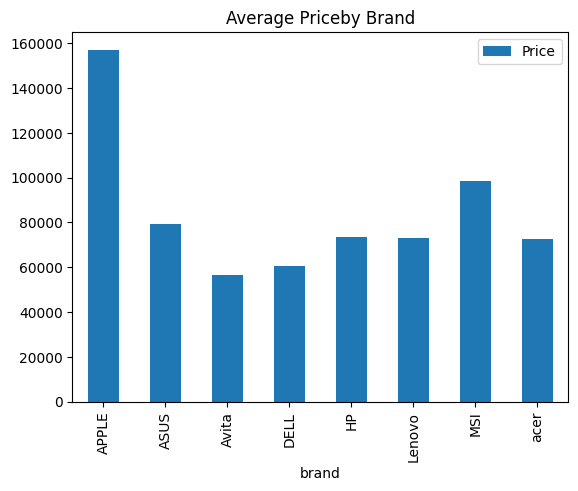

In [83]:
a.plot(kind='bar', title='Average Priceby Brand')

In [84]:
df[cat].nunique()

brand               8
processor_brand     3
processor_name     11
processor_gnrtn     8
ram_gb              4
ram_type            6
ssd                 7
hdd                 4
os                  3
os_bit              2
graphic_card_gb     5
weight              3
warranty            4
Touchscreen         2
msoffice            2
rating              5
dtype: int64

### Get the median price of laptop by weight and warranty

In [85]:
b = df.groupby(by=['weight', 'warranty']).agg({'Price':'median'})
b

Price
weight     warranty             
Casual     1 year        77990.0
           2 years       63990.0
           3 years       80239.0
           No warranty   64990.0
Gaming     1 year        70490.0
           No warranty   72990.0
ThinNlight 1 year        49990.0
           2 years       45740.0
           3 years      125394.0
           No warranty   55990.0

<Axes: xlabel='weight,warranty'>

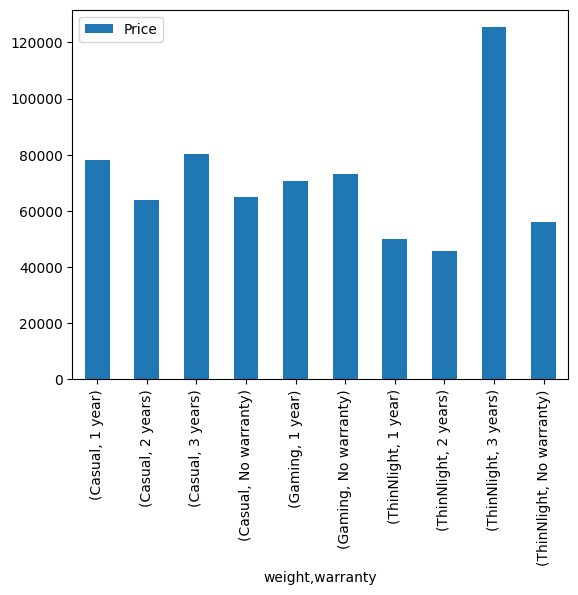

In [86]:
b.plot(kind='bar')